# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [4]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
print("Dataset Shape:", df_data.shape)
print("\nColumn Names:")
print(df_data.columns.tolist())
print("\nFirst 5 rows:")
print(df_data.head())
print("\nData Types:")
print(df_data.dtypes)
print("\nMissing Values:")
print(df_data.isnull().sum())
print("\nDuplicate Rows:", df_data.duplicated().sum())

Dataset Shape: (4324, 9)

Column Names:
['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']

First 5 rows:
   Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [9]:
# Remove unnecessary columns
df_clean = df_data.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [10]:
# Check for duplicates and remove them
df_clean = df_data.drop_duplicates()

In [11]:
# Fill missing prices with 0 for now
df_clean['Price'] = df_clean['Price'].fillna(0)

In [12]:
print(f"\nAfter cleaning - Shape: {df_clean.shape}")
print("Missing values after cleaning:")
print(df_clean.isnull().sum())


After cleaning - Shape: (4324, 9)
Missing values after cleaning:
Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64


## Descriptive Statistics

In [13]:
print("\nDescriptive Statistics:")
print(df_clean.describe())


Descriptive Statistics:
       Unnamed: 0.1  Unnamed: 0
count      4,324.00    4,324.00
mean       2,161.50    2,161.50
std        1,248.38    1,248.38
min            0.00        0.00
25%        1,080.75    1,080.75
50%        2,161.50    2,161.50
75%        3,242.25    3,242.25
max        4,323.00    4,323.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
org_launches = df_clean['Organisation'].value_counts().reset_index()
org_launches.columns = ['Organisation', 'Number of Launches']

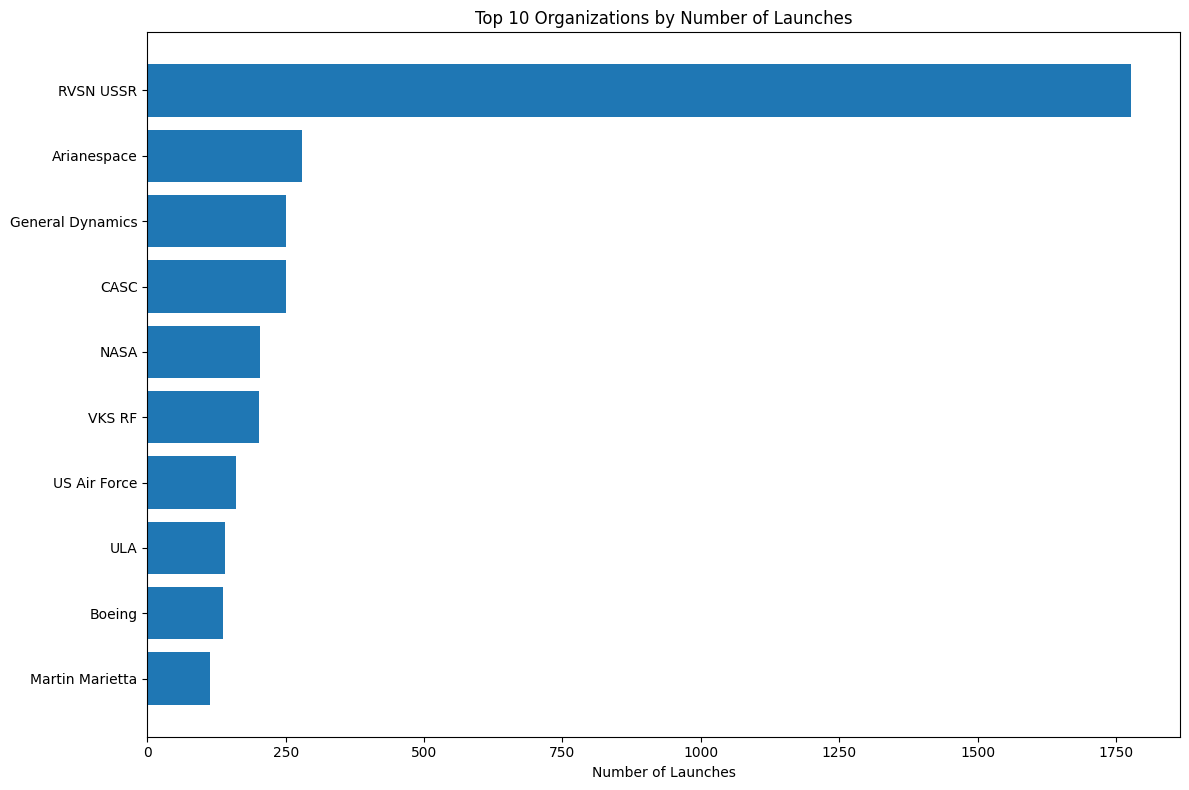

In [15]:
plt.figure(figsize=(12, 8))
top_orgs = org_launches.head(10)
plt.barh(top_orgs['Organisation'], top_orgs['Number of Launches'])
plt.xlabel('Number of Launches')
plt.title('Top 10 Organizations by Number of Launches')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [16]:
rocket_status = df_clean['Rocket_Status'].value_counts()

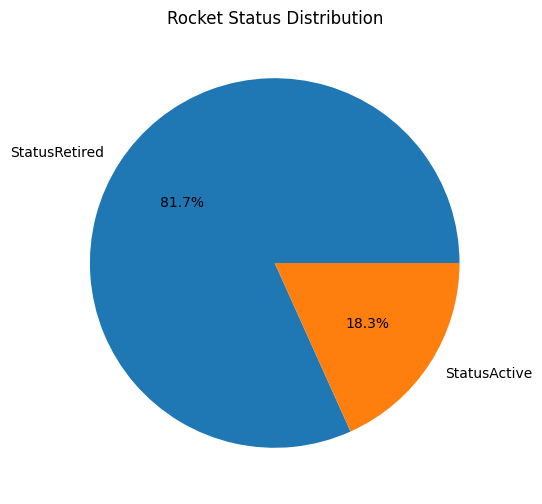

In [17]:
plt.figure(figsize=(8, 6))
plt.pie(rocket_status.values, labels=rocket_status.index, autopct='%1.1f%%')
plt.title('Rocket Status Distribution')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [19]:
mission_status = df_clean['Mission_Status'].value_counts()

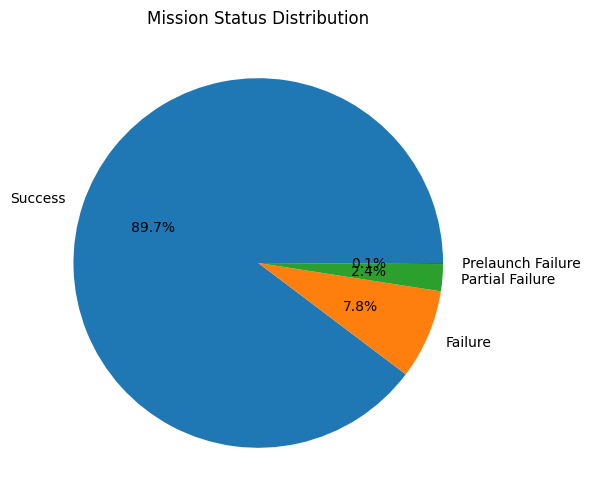

In [20]:
plt.figure(figsize=(8, 6))
plt.pie(mission_status.values, labels=mission_status.index, autopct='%1.1f%%')
plt.title('Mission Status Distribution')
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

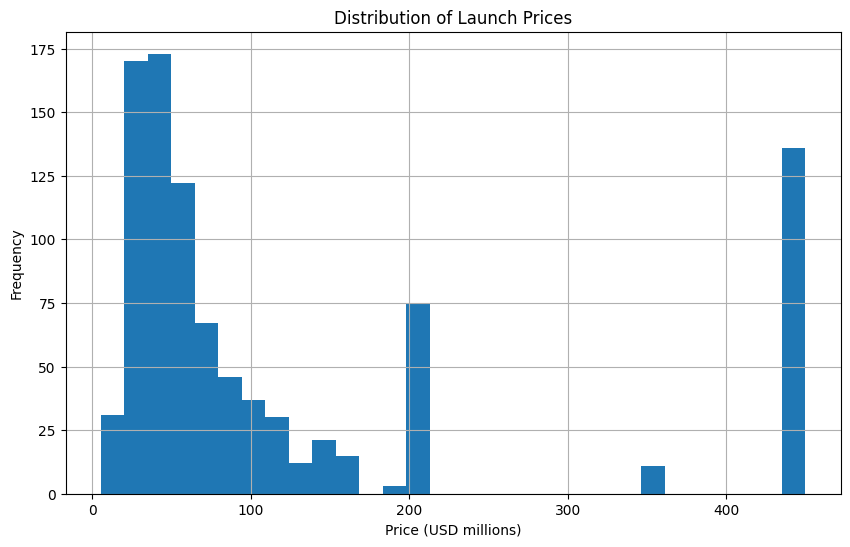

In [30]:
# Convert Price column to numeric, coercing errors to NaN
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

plt.figure(figsize=(10, 6))
df_clean[df_clean['Price'] > 0]['Price'].hist(bins=30)
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Launch Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [33]:
def extract_country(location):
    location = str(location)
    if 'USA' in location or 'Florida' in location or 'Texas' in location or 'California' in location or 'New Mexico' in location or 'Pacific Missile Range Facility' in location or 'Gran Canaria' in location:
        return 'USA'
    elif 'Russia' in location or 'Baikonur' in location or 'Plesetsk' in location or 'Barents Sea' in location or 'Vostochny' in location:
        return 'Russian Federation'
    elif 'China' in location or 'Yellow Sea' in location:
        return 'China'
    elif 'Iran' in location or 'Shahrud Missile Test Site' in location:
        return 'Iran'
    elif 'Kazakhstan' in location:
        return 'Kazakhstan'
    elif 'French Guiana' in location:
        return 'France'
    elif 'India' in location:
        return 'India'
    elif 'Japan' in location:
        return 'Japan'
    elif 'New Zealand' in location:
        return 'New Zealand'
    elif 'Israel' in location:
        return 'Israel'
    elif 'North Korea' in location or 'Sohae' in location:
        return 'North Korea'
    elif 'South Korea' in location:
        return 'South Korea'
    else:
        # Try to extract the last country name from the location string
        parts = location.split(',')
        for part in reversed(parts):
            part = part.strip()
            if part in ['USA', 'China', 'Russia', 'India', 'Japan', 'France', 'Kazakhstan']:
                return part
        return 'Other'

df_clean['Country'] = df_clean['Location'].apply(extract_country)

# Get country codes
country_launches = df_clean['Country'].value_counts().reset_index()
country_launches.columns = ['Country', 'Launches']

# Create mapping for iso3166
country_code_map = {
    'USA': 'USA',
    'Russian Federation': 'RUS',
    'China': 'CHN',
    'France': 'FRA',
    'Kazakhstan': 'KAZ',
    'India': 'IND',
    'Japan': 'JPN',
    'Iran': 'IRN',
    'Israel': 'ISR',
    'New Zealand': 'NZL',
    'North Korea': 'PRK',
    'South Korea': 'KOR',
    'Other': 'OTH'
}

country_launches['Code'] = country_launches['Country'].map(country_code_map)

# Create choropleth map
fig = px.choropleth(country_launches,
                    locations="Code",
                    color="Launches",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Number of Space Launches by Country")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [34]:
failures_by_country = df_clean[df_clean['Mission_Status'].isin(['Failure', 'Prelaunch Failure', 'Partial Failure'])]['Country'].value_counts().reset_index()
failures_by_country.columns = ['Country', 'Failures']
failures_by_country['Code'] = failures_by_country['Country'].map(country_code_map)

In [37]:
fig = px.choropleth(failures_by_country,
                    locations="Code",
                    color="Failures",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Number of Failed Space Launches by Country")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [38]:
sunburst_data = df_clean[['Country', 'Organisation', 'Mission_Status']].copy()
sunburst_data = sunburst_data[sunburst_data['Country'].isin(['USA', 'Russian Federation', 'China', 'France', 'India'])]

In [39]:
fig = px.sunburst(sunburst_data, path=['Country', 'Organisation', 'Mission_Status'],
                  title='Space Missions Sunburst Chart by Country, Organization, and Status')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [40]:
org_spending = df_clean.groupby('Organisation')['Price'].sum().reset_index()
org_spending = org_spending[org_spending['Price'] > 0].sort_values('Price', ascending=False)

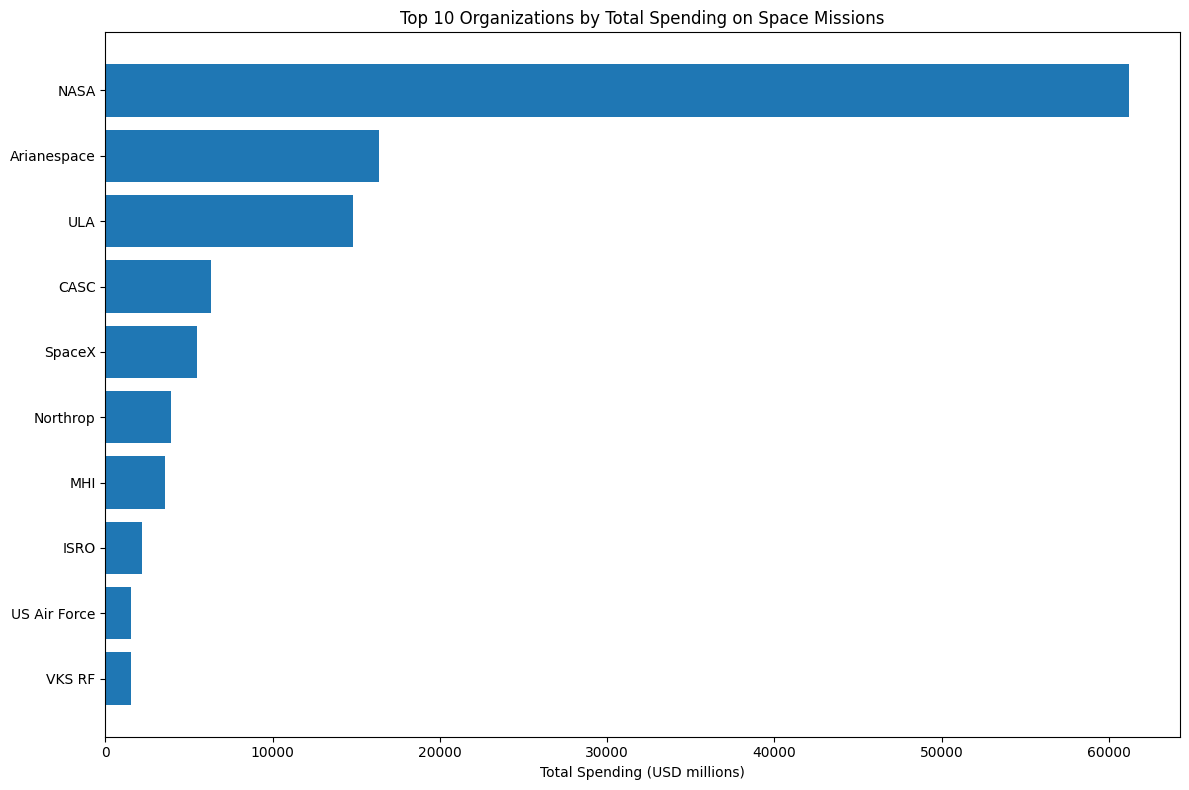

In [41]:
plt.figure(figsize=(12, 8))
top_spenders = org_spending.head(10)
plt.barh(top_spenders['Organisation'], top_spenders['Price'])
plt.xlabel('Total Spending (USD millions)')
plt.title('Top 10 Organizations by Total Spending on Space Missions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [42]:
org_launches_count = df_clean[df_clean['Price'] > 0].groupby('Organisation').size().reset_index()
org_launches_count.columns = ['Organisation', 'Launch_Count']
org_spending_per_launch = pd.merge(org_spending, org_launches_count, on='Organisation')
org_spending_per_launch['Price_Per_Launch'] = org_spending_per_launch['Price'] / org_spending_per_launch['Launch_Count']
org_spending_per_launch = org_spending_per_launch.sort_values('Price_Per_Launch', ascending=False)

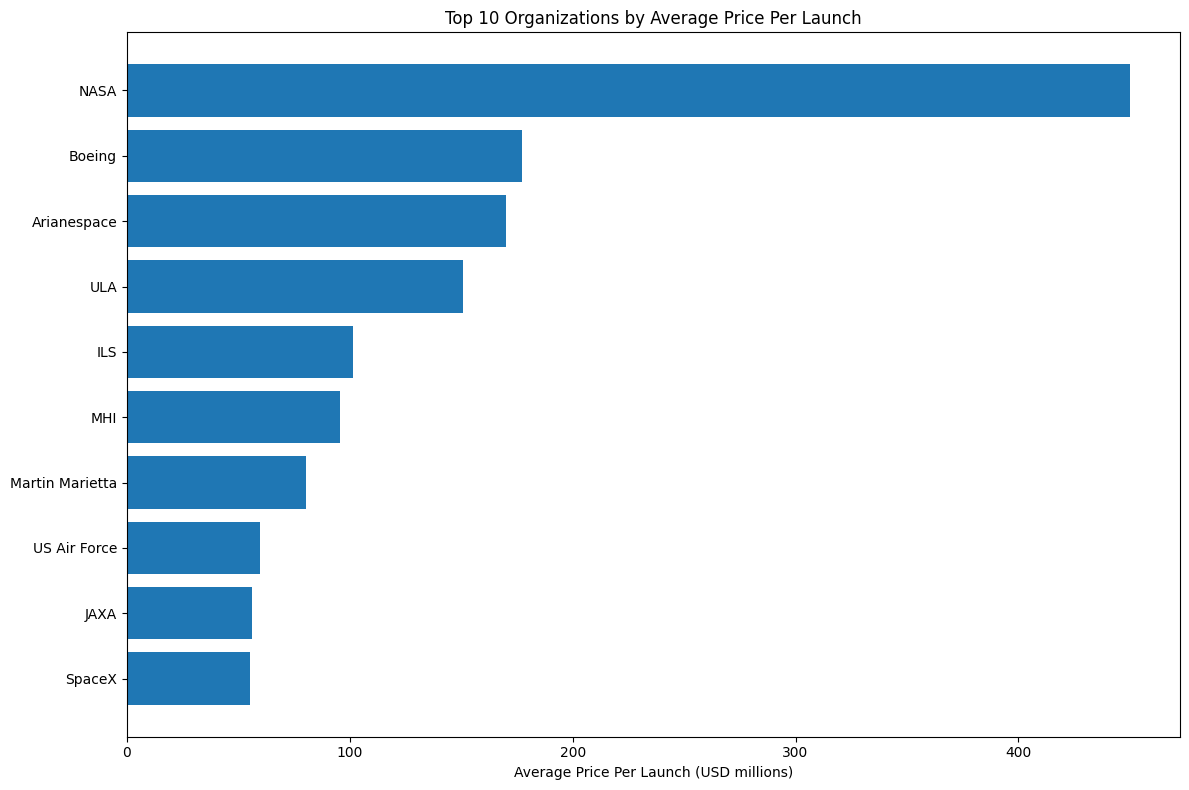

In [43]:
plt.figure(figsize=(12, 8))
top_per_launch = org_spending_per_launch.head(10)
plt.barh(top_per_launch['Organisation'], top_per_launch['Price_Per_Launch'])
plt.xlabel('Average Price Per Launch (USD millions)')
plt.title('Top 10 Organizations by Average Price Per Launch')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [44]:
# Convert Date to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean = df_clean.dropna(subset=['Date'])
df_clean['Year'] = df_clean['Date'].dt.year

In [45]:
launches_per_year = df_clean.groupby('Year').size().reset_index()
launches_per_year.columns = ['Year', 'Launches']

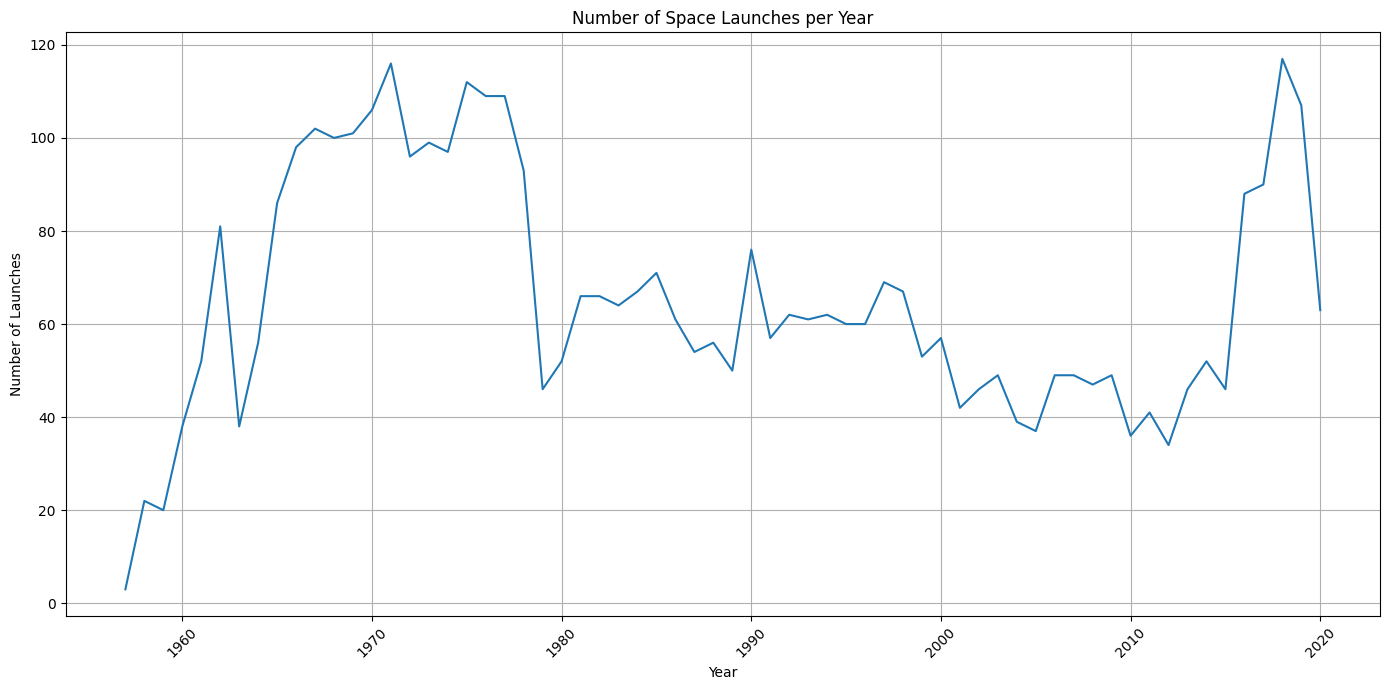

In [46]:
plt.figure(figsize=(14, 7))
plt.plot(launches_per_year['Year'], launches_per_year['Launches'])
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Space Launches per Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [47]:
df_clean['Month'] = df_clean['Date'].dt.to_period('M')
launches_per_month = df_clean.groupby('Month').size().reset_index()
launches_per_month.columns = ['Month', 'Launches']
launches_per_month['Month'] = launches_per_month['Month'].astype(str)
launches_per_month['Rolling_Avg'] = launches_per_month['Launches'].rolling(window=12).mean()

/tmp/ipython-input-2429708019.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



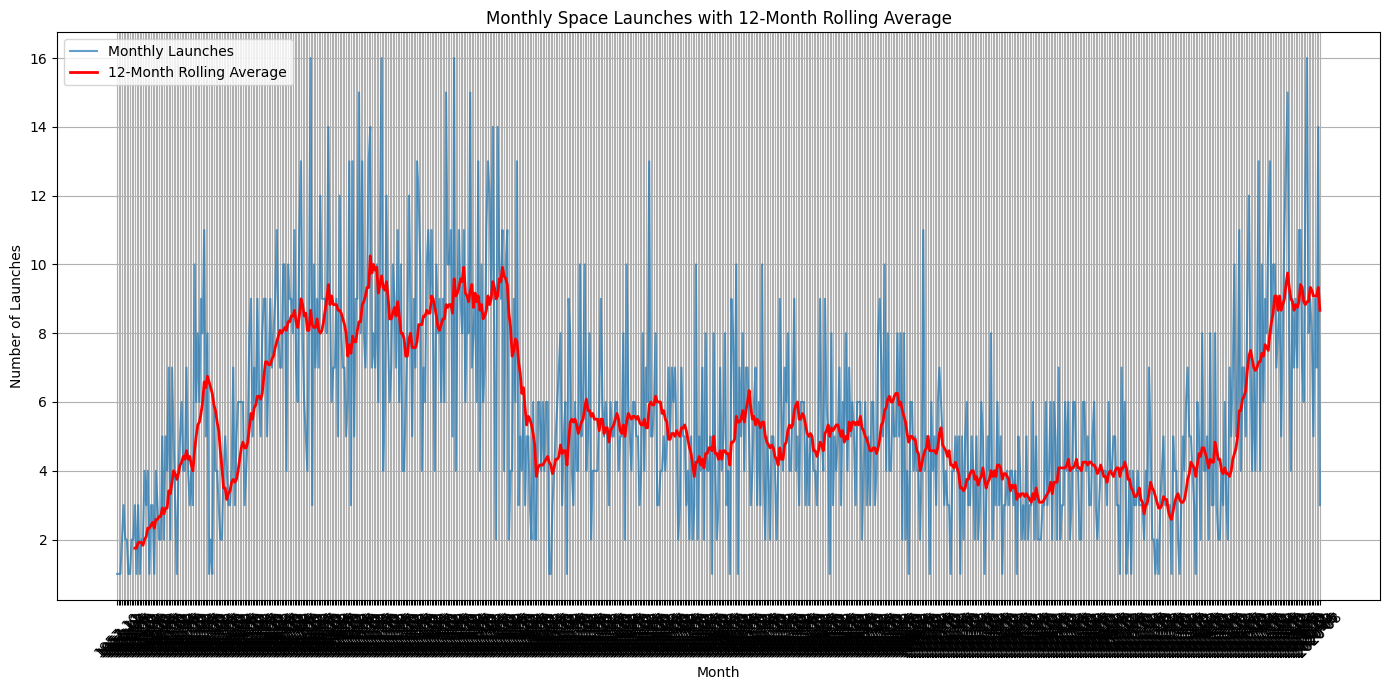

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(launches_per_month['Month'], launches_per_month['Launches'], label='Monthly Launches', alpha=0.7)
plt.plot(launches_per_month['Month'], launches_per_month['Rolling_Avg'], label='12-Month Rolling Average', color='red', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Monthly Space Launches with 12-Month Rolling Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [49]:
df_clean['Month_Name'] = df_clean['Date'].dt.month_name()
monthly_launches = df_clean['Month_Name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

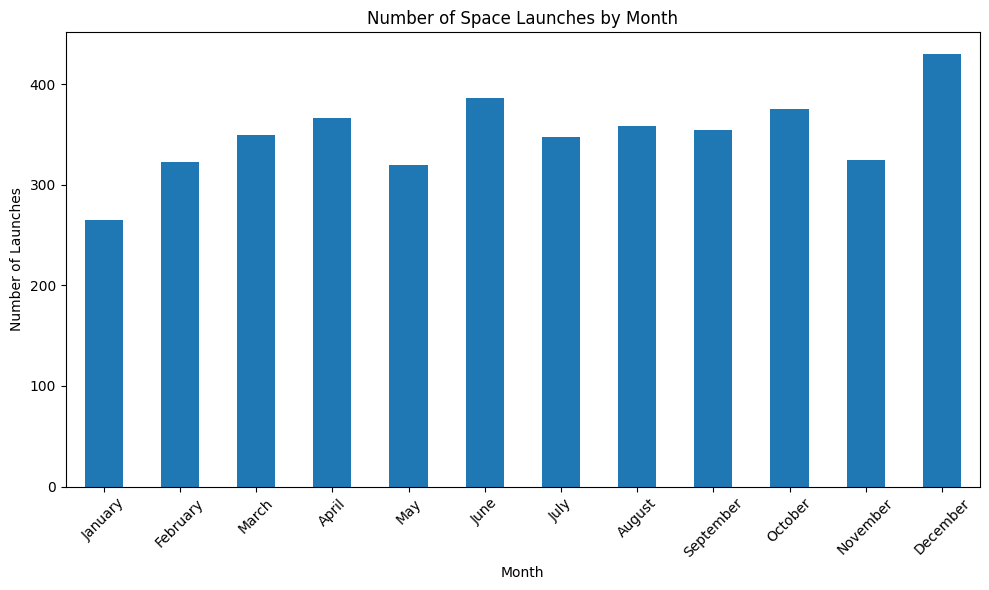

In [50]:
plt.figure(figsize=(10, 6))
monthly_launches.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Number of Space Launches by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [51]:
yearly_prices = df_clean[df_clean['Price'] > 0].groupby('Year')['Price'].mean().reset_index()

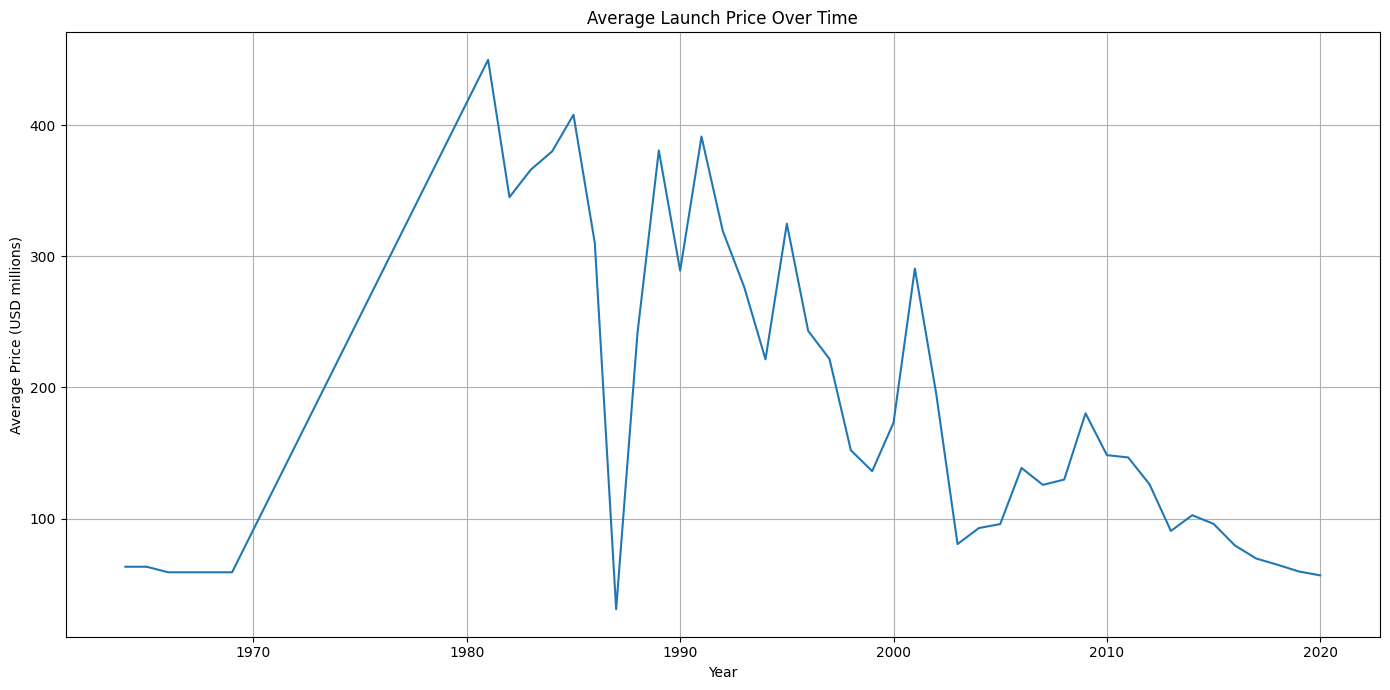

In [52]:
plt.figure(figsize=(14, 7))
plt.plot(yearly_prices['Year'], yearly_prices['Price'])
plt.xlabel('Year')
plt.ylabel('Average Price (USD millions)')
plt.title('Average Launch Price Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [53]:
top_orgs_list = org_launches.head(10)['Organisation'].tolist()
org_launches_over_time = df_clean[df_clean['Organisation'].isin(top_orgs_list)]
org_launches_over_time = org_launches_over_time.groupby(['Year', 'Organisation']).size().reset_index()
org_launches_over_time.columns = ['Year', 'Organisation', 'Launches']

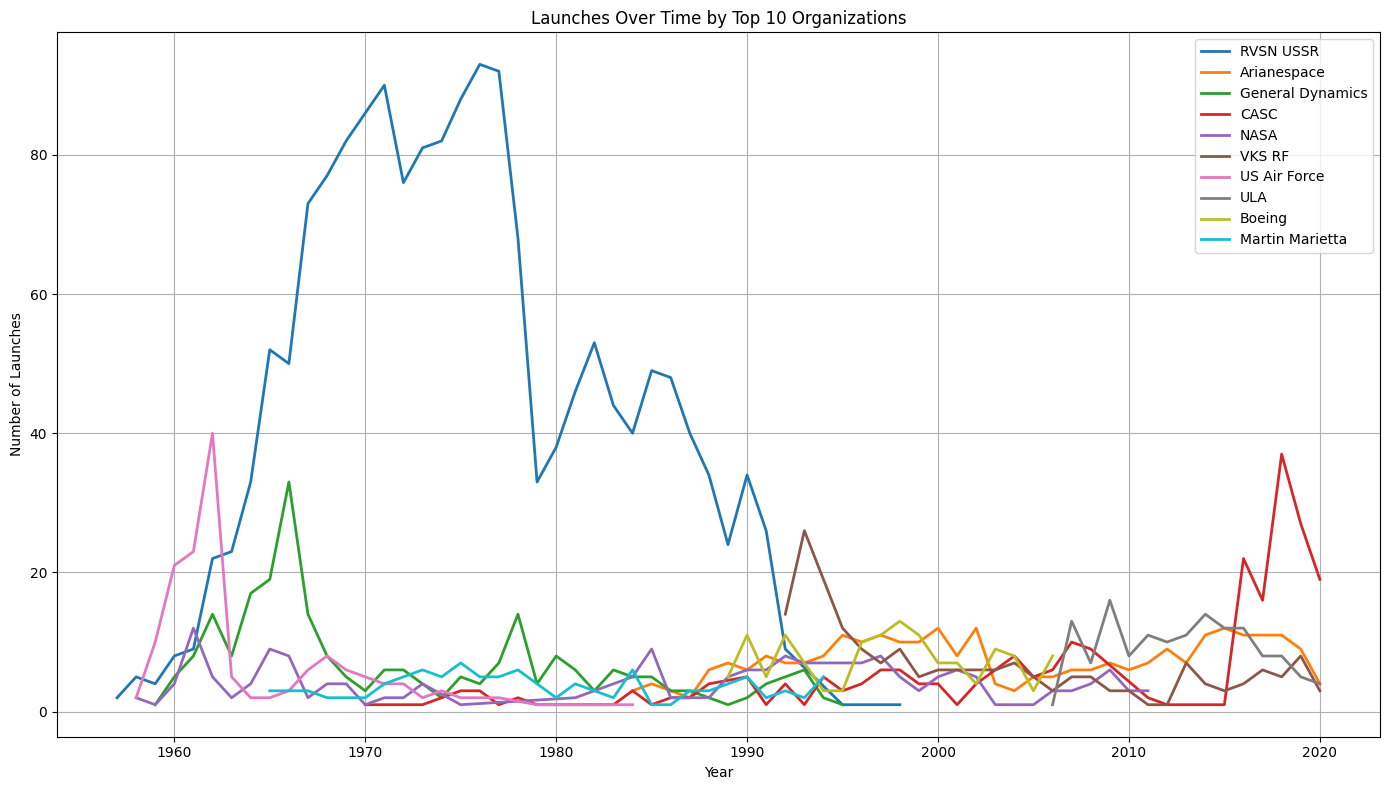

In [54]:
plt.figure(figsize=(14, 8))
for org in top_orgs_list:
    org_data = org_launches_over_time[org_launches_over_time['Organisation'] == org]
    plt.plot(org_data['Year'], org_data['Launches'], label=org, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Launches Over Time by Top 10 Organizations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [55]:
df_clean['Cold_War_Era'] = df_clean['Year'] <= 1991
cold_war_launches = df_clean[df_clean['Cold_War_Era']]

In [56]:
def cold_war_country(country):
    if country in ['USA']:
        return 'USA'
    elif country in ['Russian Federation', 'Kazakhstan']:
        return 'USSR'
    else:
        return 'Other'

cold_war_launches['Cold_War_Group'] = cold_war_launches['Country'].apply(cold_war_country)
cold_war_totals = cold_war_launches['Cold_War_Group'].value_counts()

/tmp/ipython-input-4233380699.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [57]:
fig = px.pie(values=cold_war_totals.values, names=cold_war_totals.index,
             title='Cold War Space Race: USA vs USSR Launches (1957-1991)')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [58]:
cold_war_yearly = cold_war_launches.groupby(['Year', 'Cold_War_Group']).size().reset_index()
cold_war_yearly.columns = ['Year', 'Group', 'Launches']

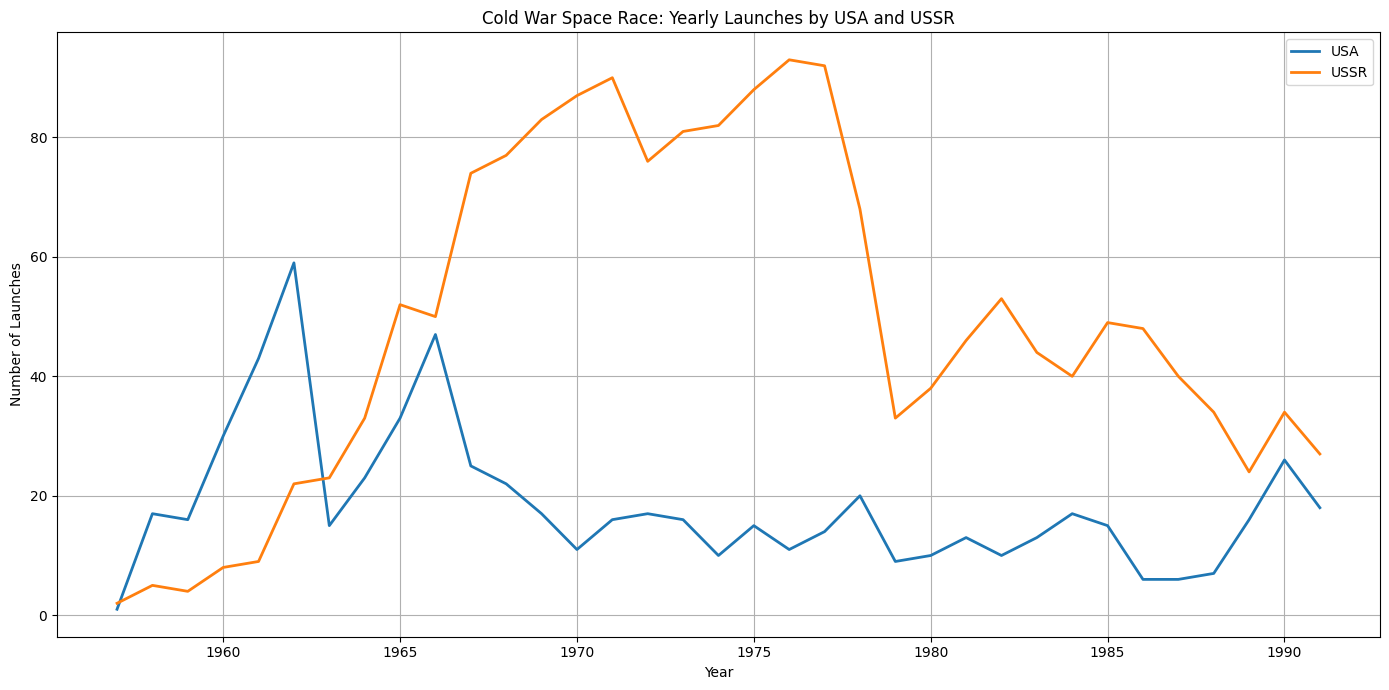

In [59]:
plt.figure(figsize=(14, 7))
for group in ['USA', 'USSR']:
    group_data = cold_war_yearly[cold_war_yearly['Group'] == group]
    plt.plot(group_data['Year'], group_data['Launches'], label=group, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Cold War Space Race: Yearly Launches by USA and USSR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [60]:
failures_yearly = df_clean[df_clean['Mission_Status'].isin(['Failure', 'Prelaunch Failure', 'Partial Failure'])].groupby('Year').size().reset_index()
failures_yearly.columns = ['Year', 'Failures']

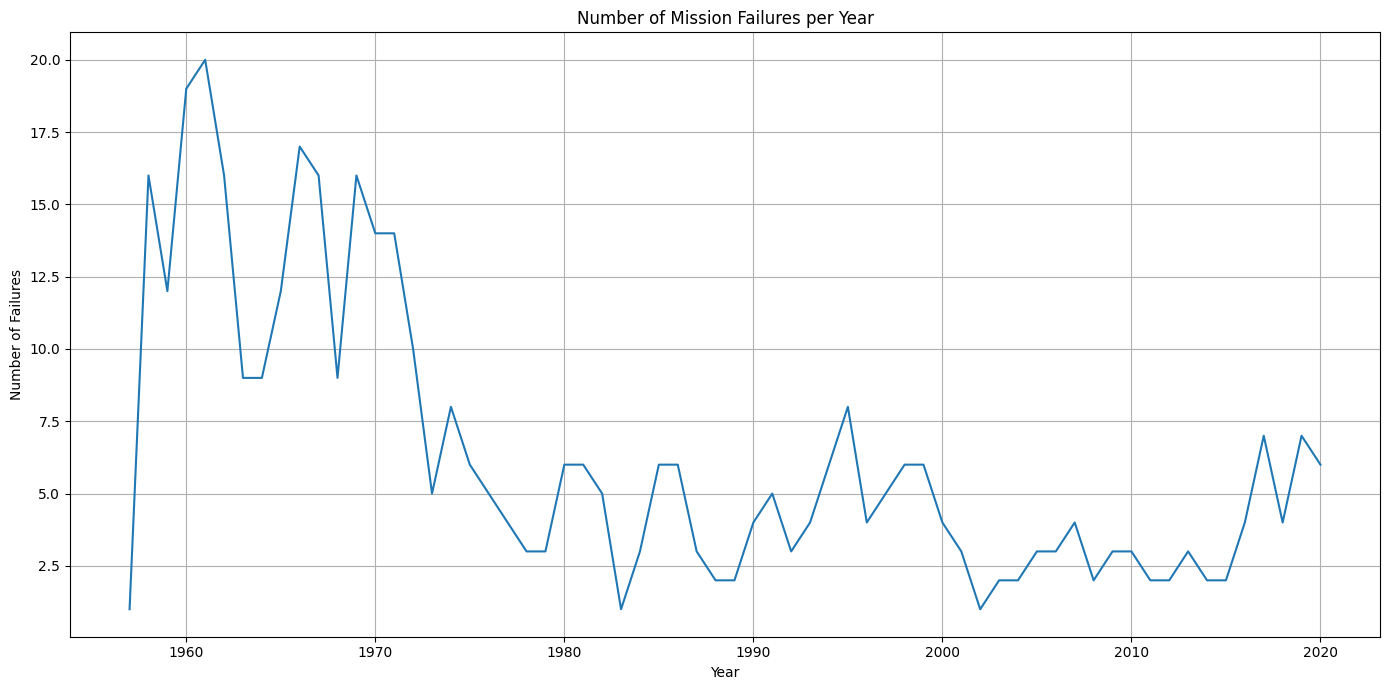

In [61]:
plt.figure(figsize=(14, 7))
plt.plot(failures_yearly['Year'], failures_yearly['Failures'])
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.title('Number of Mission Failures per Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [62]:
total_launches_yearly = df_clean.groupby('Year').size().reset_index()
total_launches_yearly.columns = ['Year', 'Total_Launches']
failure_rates = pd.merge(failures_yearly, total_launches_yearly, on='Year')
failure_rates['Failure_Rate'] = (failure_rates['Failures'] / failure_rates['Total_Launches']) * 100

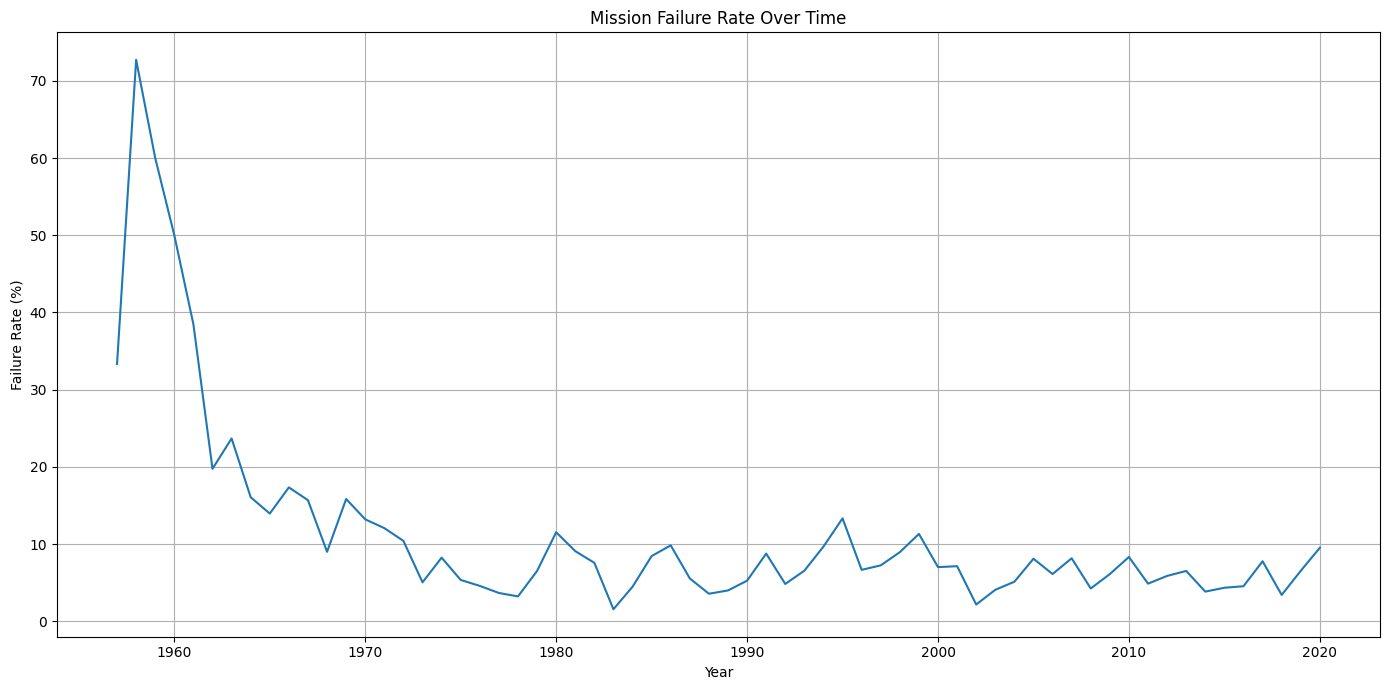

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(failure_rates['Year'], failure_rates['Failure_Rate'])
plt.xlabel('Year')
plt.ylabel('Failure Rate (%)')
plt.title('Mission Failure Rate Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [65]:
yearly_country_launches = df_clean.groupby(['Year', 'Country']).size().reset_index()
yearly_country_launches.columns = ['Year', 'Country', 'Launches']

leading_countries = yearly_country_launches.loc[yearly_country_launches.groupby('Year')['Launches'].idxmax()]

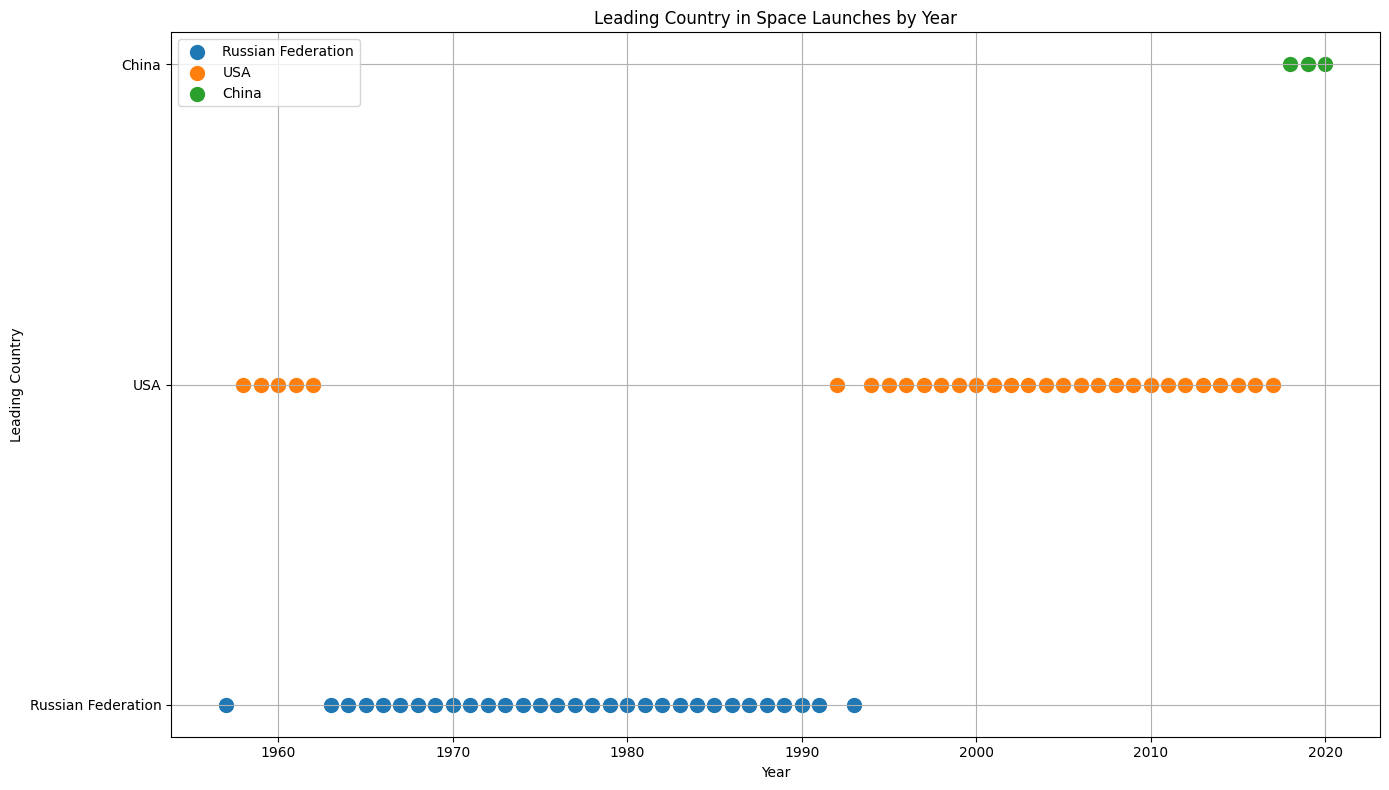

In [66]:
plt.figure(figsize=(14, 8))
for country in leading_countries['Country'].unique():
    country_data = leading_countries[leading_countries['Country'] == country]
    plt.scatter(country_data['Year'], country_data['Country'], label=country, s=100)

plt.xlabel('Year')
plt.ylabel('Leading Country')
plt.title('Leading Country in Space Launches by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [68]:
yearly_org_launches = df_clean.groupby(['Year', 'Organisation']).size().reset_index()
yearly_org_launches.columns = ['Year', 'Organisation', 'Launches']

leading_orgs = yearly_org_launches.loc[yearly_org_launches.groupby('Year')['Launches'].idxmax()]

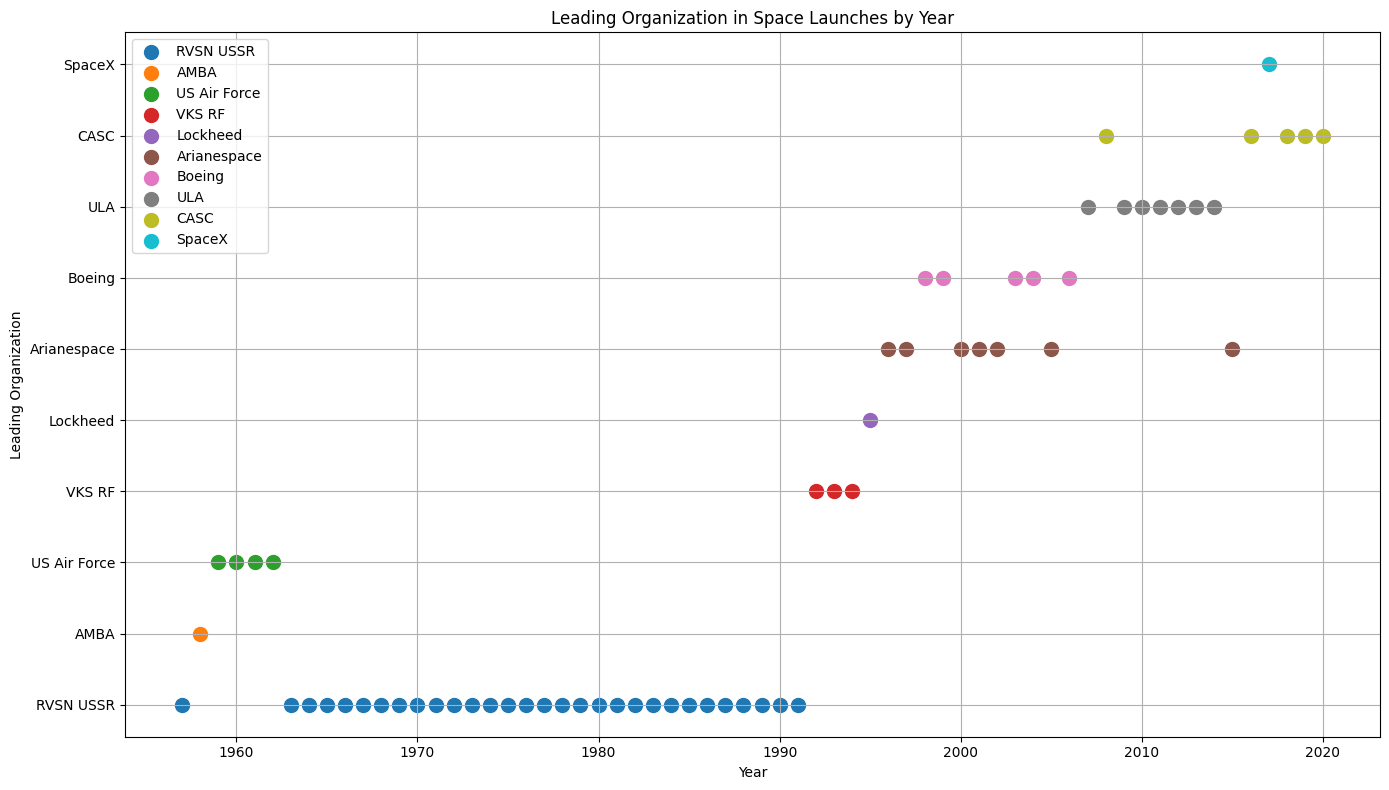

Analysis complete! All charts have been generated.


In [69]:
plt.figure(figsize=(14, 8))
for org in leading_orgs['Organisation'].unique():
    org_data = leading_orgs[leading_orgs['Organisation'] == org]
    plt.scatter(org_data['Year'], org_data['Organisation'], label=org, s=100)

plt.xlabel('Year')
plt.ylabel('Leading Organization')
plt.title('Leading Organization in Space Launches by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Analysis complete! All charts have been generated.")